In [2]:
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import xlwt
import heapq
from heapq import *
import matplotlib.pyplot as plt

from EM import *
from cleaningData import *

In [2]:
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

# Our numerical workhorses
import numpy as np
import scipy.integrate

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv("NIPS_1987-2015.csv", sep=',', index_col = 0)
df.shape

(11463, 5811)

B = 11463 words (corresponds to rows) ; L = 5811 texts (corresponds to columns)

In [4]:
dfTranspose = df.transpose()

# Here: Choice of nb of bins

In [6]:
B = 300
R = 0
data = extractSubDictionary(dfTranspose, B)

# Viewing the data

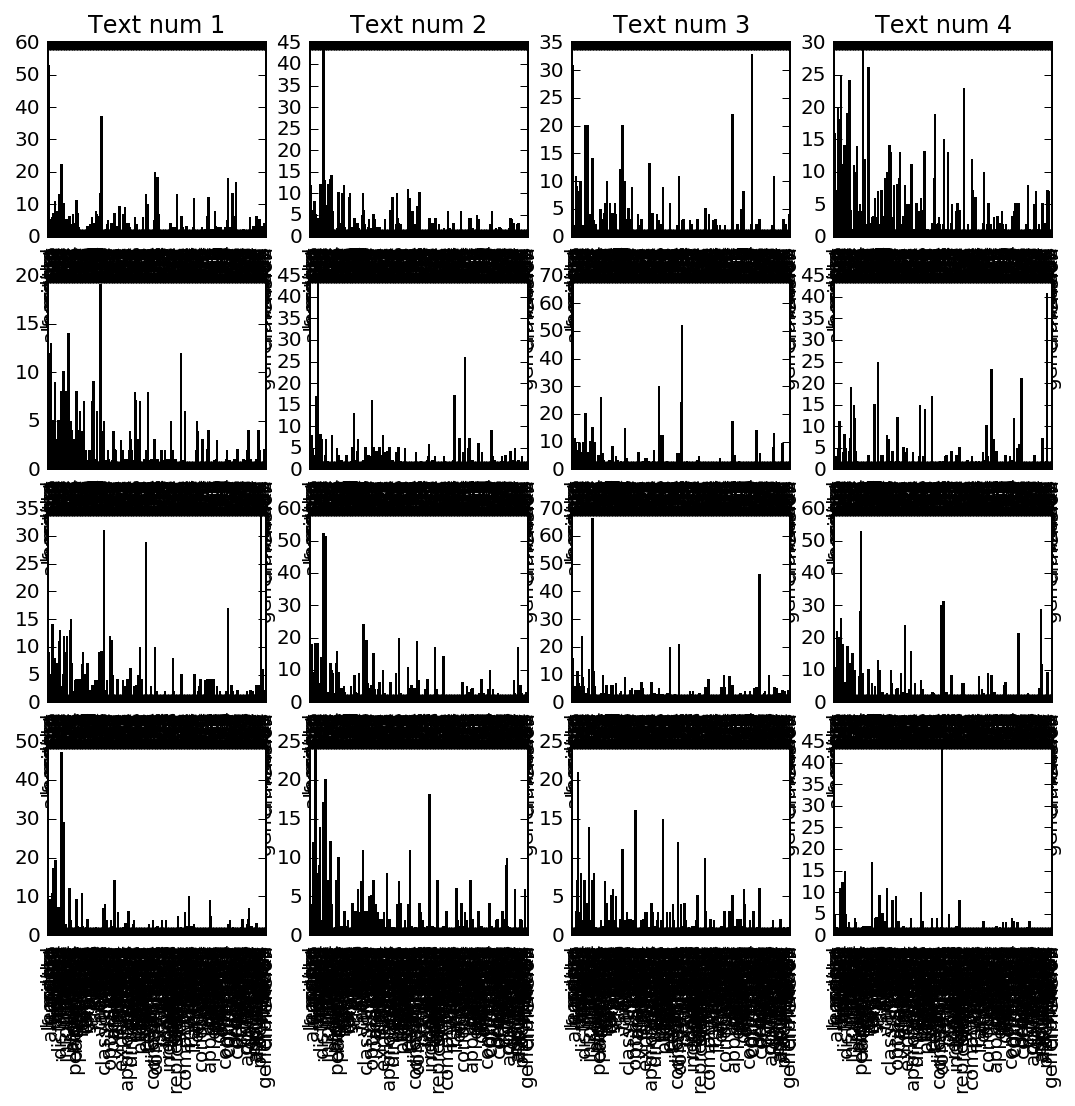

In [7]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, 17):
    fig.add_subplot(4,4,k)
    data.ix[k,].plot.bar()
    plt.axhline(0, color='k')
    plt.title("Text num " + str(k))

# Cleaning of data : removing void articles

In [8]:
n = float(data.sum().sum())
n

4496250.0

In [9]:
indexes = nullArticlesIndexes(data)
data.drop(data.index[indexes], inplace = True)

2452
3277
4062
4099
4204
4228
5595


In [41]:
#dataClean = data.apply(perc, axis=1)

In [42]:
#dataClean.shape

In [43]:
#np.sum(dataClean, axis = 1)

# Now running EM

In [10]:
thresholdConvergence = 1
epsilonForInitialization = .01
deltaInit = 0
L = len(data)
B = data.shape[1]
K = 30
#dataClean = dataClean.values
dataClean = data.values

In [13]:
shortRuns = shortRunsEM(dataClean, K, L, B, thresholdConvergence, epsilonForInitialization,  maxShortRunIterations = 15, numberOfRuns =500)

1-th short run of EM
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -28360190.646730412)
E-step ...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 30, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('

KeyboardInterrupt: 

In [15]:
len(np.sum(dataClean, axis = 1))

5804

In [16]:
Pinit, PiInit = initializePandPi(K,B,dataClean,epsilonForInitialization)

In [17]:
PiInit

array([ 0.14940163,  0.1499452 ,  0.00518605,  0.01146201,  0.00723742,
        0.00262269,  0.07073938,  0.0535317 ,  0.03136992,  0.03211135,
        0.02590683,  0.01136517,  0.04656116,  0.01486735,  0.00298388,
        0.00723631,  0.00562532,  0.05381986,  0.01452154,  0.09491437,
        0.01275817,  0.00333087,  0.00498445,  0.04388493,  0.05910107,
        0.01781624,  0.03622857,  0.01302927,  0.01694617,  0.00051112])

In [18]:
Pinit

array([[  2.48735516e-02,   1.40763624e-02,   9.44212359e-03, ...,
          1.92505837e-05,   1.92018161e-05,   1.91069903e-05],
       [  1.92404302e-04,   3.98056601e-02,   4.27254015e-03, ...,
          1.70675458e-05,   1.38330297e-03,   1.69402360e-05],
       [  4.84922160e-03,   1.32842749e-03,   2.49104001e-03, ...,
          1.46290826e-05,   1.45920227e-05,   1.45199617e-05],
       ..., 
       [  6.37132992e-03,   4.82272876e-03,   6.48194445e-02, ...,
          1.55788344e-03,   1.91722710e-05,   3.09640254e-03],
       [  3.45899392e-03,   6.68001833e-03,   6.16031759e-02, ...,
          2.01836963e-05,   1.63586302e-03,   2.00331427e-05],
       [  2.64772768e-02,   1.12521708e-02,   5.82739742e-02, ...,
          5.55043312e-03,   1.72362542e-05,   1.40043941e-03]])

ValueError: num must be 1 <= num <= 10, not 11

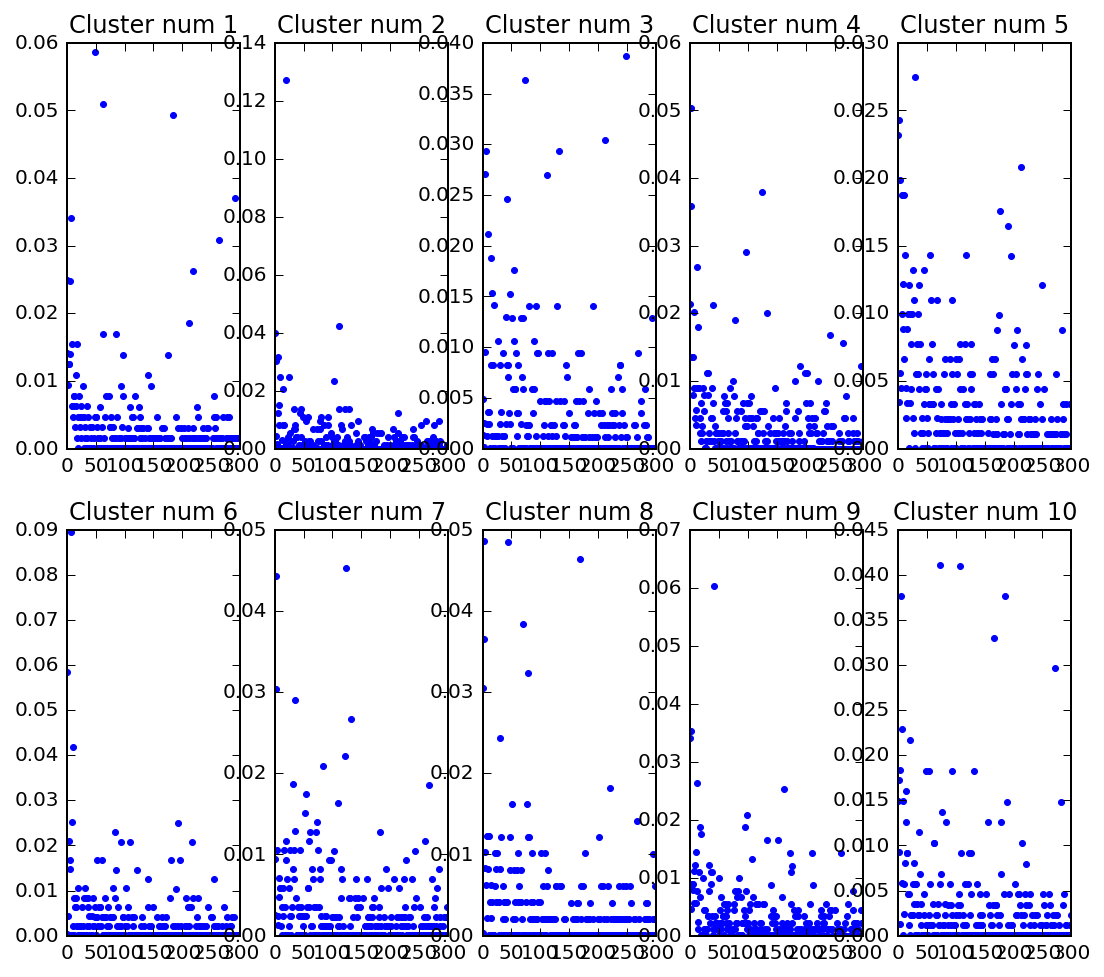

In [19]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, len(Pinit) +1 ):
    fig.add_subplot(2,5,k)
    plt.plot(range(len(Pinit[0])), Pinit[k - 1],'.')
    plt.title("Cluster num " + str(k))

In [ ]:
np.sum(Pinit, axis = 1)

In [ ]:
print ("NEW NUMBER OF CLUSTERS : " , K)
P,Pi,Rpost,logScore,logScores = expectationMaximisation2(dataClean, K, L, B, thresholdConvergence,  epsilonForInitialization, 100)

In [ ]:
Rpost[1:10,]

In [ ]:
fig = plt.figure(1, figsize=(9,8))

for k in range(1, len(P) +1 ):
    fig.add_subplot(2,5,k)
    plt.plot(range(len(P[0])), P[k - 1],'.')
    plt.title("Cluster num " + str(k))

In [ ]:
np.sum(P, axis = 1)

In [ ]:
sum(P[1])

In [ ]:
P

In [ ]:
Rpost

In [ ]:
groups = np.argmax(Rpost, axis=1)

In [ ]:
for i in groups:
    print (i)

# Model Selection via CAPUSHE

In [ ]:
style0 = xlwt.easyxf('font: name Times New Roman, color-index red, bold on',
    num_format_str='#,##0.00')
style1 = xlwt.easyxf(num_format_str='D-MMM-YY')

wb = xlwt.Workbook()
ws = wb.add_sheet('EM on multinomials')

ws.write(0, 0, "model")
ws.write(0, 1, "pen shape")
ws.write(0, 2, "model complexity")
ws.write(0, 3, "contrast")

wb.save('Model Selection via CAPUSHE - May 16th 2017.xls')

In [ ]:
logKClusters = []
modelNumber = 1
for k in range(1,100,1):
    ws.write(modelNumber, 0, "K = " + str(k))
    ws.write(modelNumber, 1, k*B -1 + L * log(k))
    ws.write(modelNumber, 2, k*B -1 + L * log(k))

    print ("NEW NUMBER OF CLUSTERS : " ,k)
    P,Pi,Rpost,logScore,logScores = expectationMaximisation2(data, k, L, B, thresholdConvergence, 200)
    if len(logKClusters) == 0: 
        ws.write(modelNumber, 3, - logScore)
    else:
        ws.write(modelNumber, 3, - max(logScore, max(logKClusters)))
    
    wb.save('Model Selection via CAPUSHE - May 16th 2017.xls')
    modelNumber +=1
    logKClusters.append(logScore)

# Model Selection via CV

In [12]:
data.shape

(5804, 300)

In [14]:
percentageTrain = int(.6 * len(data))
percentageTrain

3482

In [37]:
thresholdConvergence = 1
epsilonForInitialization = .01
deltaInit = 0

In [39]:
testLL = []
for k in range(1,10, 5):
    print ("New number of clusters ! ")
    testLLk = []
    for i in range(10):
        print ("New running of EM with ", str(k), " clusters")
        trainIndexes = random.sample(range(len(data)), percentageTrain)
        dataTrain = data.ix[trainIndexes]
        
        testIndexes = [i for i in range(len(data)) if i not in trainIndexes]
        dataTest = data.ix[testIndexes]
        
        P,Pi,Rpost,logScore,logScores = expectationMaximisation2(dataTrain.values, k, len(dataTrain), B, thresholdConvergence,epsilonForInitialization, 200)
        llTestk_At_i = logLikelihood(k, len(dataTest), B, P, Pi, dataTest.values)
        testLLk.append(llTestk_At_i)
        
    testLL.append(np.mean(testLLk))

New number of clusters ! 
1-th short run of EM
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -384592393.6337198)
E-step ...
('Number of clusters: ', 1, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 1, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 1, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 1, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
2-th short run of EM
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
('Initial logScore: ', -355705141.66124117)
E-step ...
('Number of clusters: ', 1, '/ Number of bins: ', 300)
M-step...
('Number of clusters: ', 1, '/ Number of bins: ', 300)
Compute likelihood using current responsibility...
('Number of bins:  ', 300)
E-step ...
('Number of clusters: ', 1, '/ Number of bins: ', 3

KeyboardInterrupt: 

In [40]:
testLL

[-9949910.2245990392]